In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from datetime import date
import holidays
sns.set()
import warnings
warnings.filterwarnings("ignore")

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "Verdana"

In [2]:
df = pd.read_csv('data/clean/LAD+incident2.csv', index_col=0)
df.DateTime = pd.to_datetime(df.DateTime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6007680 entries, 0 to 6007679
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   ID                int64         
 1   DateTime          datetime64[ns]
 2   Length            float64       
 3   Volume            float64       
 4   Speed             float64       
 5   Occupancy         float64       
 6   Incident_Type     object        
 7   TrafficCondition  object        
 8   Congestion        object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 458.3+ MB


In [3]:
df9 = df[df.ID==9]

df9.drop('ID', axis=1, inplace=True)
df9.drop('Length', axis=1, inplace=True)
df9.drop('Congestion', axis=1, inplace=True)
df9.drop('TrafficCondition', axis=1, inplace=True)
df9 = df9.set_index('DateTime')
df9.index = pd.to_datetime(df9.index)
if not df9.index.is_monotonic:
    df9 = df9.sort_index()

df9.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429120 entries, 2018-01-01 00:00:00 to 2018-10-25 23:59:00
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Volume         429120 non-null  float64
 1   Speed          429120 non-null  float64
 2   Occupancy      429120 non-null  float64
 3   Incident_Type  2738 non-null    object 
dtypes: float64(3), object(1)
memory usage: 16.4+ MB


In [4]:
df9['Incident'] = df9['Incident_Type'].notnull()
df9.Incident.value_counts()

False    426382
True       2738
Name: Incident, dtype: int64

In [5]:
df9['Density'] = df9['Occupancy']*4000/700

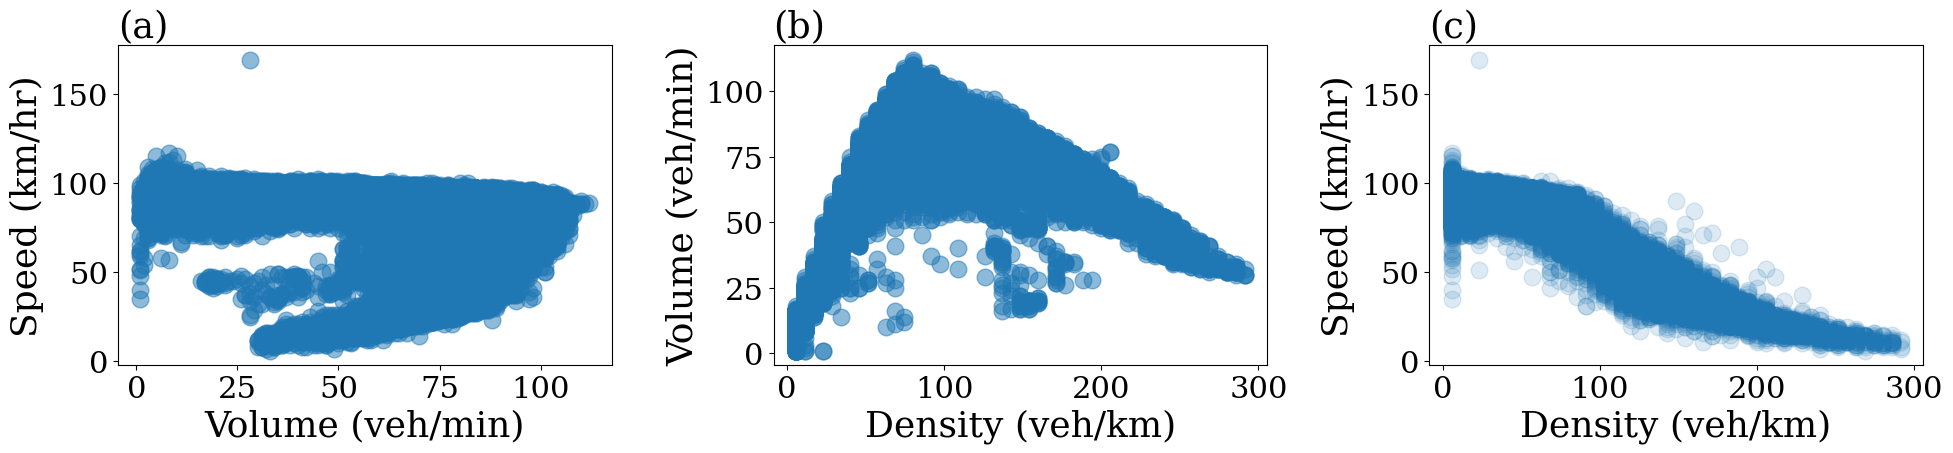

In [9]:
def fund_plot(df):
    plt.rcParams["lines.markersize"] = 12
    plt.rcParams["font.size"] = 22
    temp = df[df.Density != 0]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    ax[0].scatter(temp.Volume, temp.Speed, alpha=0.5)
    ax[0].set_xlabel('Volume (veh/min)', fontsize=26)
    ax[0].set_ylabel('Speed (km/hr)', fontsize=26)
    ax[0].set_title('(a)', loc='left')

    ax[1].scatter(temp.Density, temp.Volume, alpha=0.5)
    ax[1].set_xlabel('Density (veh/km)', fontsize=26)
    ax[1].set_ylabel('Volume (veh/min)', fontsize=26)
    ax[1].set_title('(b)', loc='left')

    ax[2].scatter(temp.Density, temp.Speed, alpha=0.15)
    ax[2].set_xlabel('Density (veh/km)', fontsize=26)
    ax[2].set_ylabel('Speed (km/hr)', fontsize=26)
    ax[2].set_title('(c)', loc='left')
    fig.tight_layout()
    # plt.savefig('fig/L9/Fundamental_plot.png', bbox_inches='tight')
    plt.show()

fund_plot(df9)

In [255]:
inc9 = pd.read_csv('data/clean/inc9_wide.csv', index_col=0)

inc9.WST_Start = pd.to_datetime(inc9.WST_Start)
inc9.WST_End = pd.to_datetime(inc9.WST_End)
inc9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 2 to 361
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OBJECTID          55 non-null     int64         
 1   Lat               55 non-null     float64       
 2   Long              55 non-null     float64       
 3   WST_Start         55 non-null     datetime64[ns]
 4   WST_End           55 non-null     datetime64[ns]
 5   Incident_Type     55 non-null     object        
 6   TrafficCondition  55 non-null     object        
 7   Congestion        55 non-null     object        
 8   Duration          55 non-null     float64       
 9   ID                55 non-null     int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 4.7+ KB


In [ ]:
inc9.Incident_Type.value_counts()

In [ ]:
inc9.Incident_Type = inc9.Incident_Type.astype('category')
inc9.Incident_Type.value_counts()

In [ ]:
inc9 = inc9.rename({'Incident_Type': 'Incident Type'}, axis=1)

cmp = mpl.colors.ListedColormap(['#ddb310', '#00b25d', '#00beff', '#b51d14'])
plt.rcParams["font.size"] = 14
p = inc9.plot(kind='scatter', x='Long', y='Lat', alpha=0.6,
          c='Incident Type', s='Duration', label='Duration', 
          rot=45, cmap=cmp, colorbar=True)
plt.ticklabel_format(useOffset=False)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
plt.savefig('fig/L9/L9_Lat_Lon.png', bbox_inches='tight')
plt.show()

In [ ]:
inc9['Incident Type'].value_counts().index

In [ ]:
def inc_bar(df):
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x=df['Incident Type'].value_counts(),
               y=df['Incident Type'].value_counts().index,
               order=df['Incident Type'].value_counts().index,
                    palette=['#ddb310', '#b51d14', '#00b25d', '#00beff'])
    ax.set_ylabel('Incident Type', size=18)
    ax.set_xlabel('Frequency', size=18)
    ax.set_xlim(right=40)
    for p in ax.patches:
      width = p.get_width()
      ax.text(width+3,
              p.get_y() + p.get_height()/2,
              str(int(width)) + '\n(' + str(np.round(width/371*100, 1)) + '%)',
              ha="center",
              va="center")
    plt.savefig('fig/L9/L9_incident_type.png', bbox_inches="tight")
    plt.show()

inc_bar(inc9)

In [ ]:
# list of days that have incident(s)
date_ls = inc9['WST_Start'].dt.date.unique()

In [ ]:
import datetime
def day_plot2(df, idx):
    plt.rcParams["lines.markersize"] = 16
    plt.rcParams["font.size"] = 16
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9), sharex=True)
    ax[0].set_title(f'{date_ls[idx].strftime("%d %B %Y")}',
                 loc='right', fontsize=14)
    ax[0].set_ylim(-10,120)
    ax[1].set_ylim(-10,120)
    ax[2].set_ylim(-20,300)

    # Base plot (no incidents)
    temp = df[(df.index.date == date_ls[idx])]
    ax[0].plot(temp.Volume, color='k', zorder=1)
    ax[1].plot(temp.Speed, color='k', zorder=1)
    ax[2].plot(temp.Density, color='k', zorder=1)
    
    # Incident
    temp1 = df[(df.index.date == date_ls[idx]) &
               (df.index.time >= datetime.time(12,0)) & 
               (df.Incident == True)]
    temp1 = temp1.reindex(pd.date_range(temp1.index.min(),
                                    temp1.index.max(),
                                    freq='1min'), fill_value=np.nan)
    m1 = (temp1.loc[temp1['Incident'].shift(1) != temp1['Incident']]).dropna()

    ax[0].plot(temp1.Volume, color='r',  zorder=1)
    ax[1].plot(temp1.Speed, color='r',  zorder=1)
    ax[2].plot(temp1.Density, color='r',  zorder=1)
    
    ax[0].scatter(m1.index, m1.Volume, color='red', marker="*", zorder=2)
    ax[0].annotate('Road Crash', 
            xy=(pd.to_datetime('2018-07-18 13:38:00'),20),
            xytext=(pd.to_datetime('2018-07-18 13:38:00'),0), ha='center',
            arrowprops=dict(color='darkred', arrowstyle="-[", lw=2))
    
    ax[1].scatter(m1.index, m1.Speed, color='red', marker="*", zorder=2)
    ax[1].annotate('Road Crash', 
            xy=(pd.to_datetime('2018-07-18 13:38:00'),20),
            xytext=(pd.to_datetime('2018-07-18 13:38:00'),0), ha='center',
            arrowprops=dict(color='darkred', arrowstyle="-[", lw=2))
    
    ax[2].scatter(m1.index, m1.Density, color='red', marker="*", zorder=2)
    ax[2].annotate('Road Crash', 
            xy=(pd.to_datetime('2018-07-18 13:38:00'),220),
            xytext=(pd.to_datetime('2018-07-18 13:38:00'),240), ha='center',
            arrowprops=dict(color='darkred', arrowstyle="-[", lw=2))
    
    ax[0].set_ylabel('Flow Rate (veh/min)', fontsize=18)
    ax[1].set_ylabel('Speed (km/hr)', fontsize=18)  
    ax[2].set_ylabel('Density (veh/km)', fontsize=18)
    ax[2].set_xlabel('Time', fontsize=18)
    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    for i in range(0, 3):
        ax[i].grid()
    fig.tight_layout()
    #plt.savefig('fig/L9/18Jul_traffic.png', bbox_inches='tight')
    plt.show()

day_plot2(df9, 31)

In [256]:
# Wednesday 18 Jul 2018
inc9[(inc9['WST_Start'].dt.date == date_ls[31]) &
     (inc9['WST_Start'].dt.time >= datetime.time(12,0))] 

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration,ID
239,16074,-32.021402,115.857566,2018-07-18 12:51:00,2018-07-18 14:24:00,Road Crash,Lane(s) Blocked,Congestion,93.0,9


In [ ]:
# Normal Wednesday
def normal_day(df):
    df = df[['Volume', 'Speed', 'Density',
             'Incident']]
    df['Weekday'] = df.index.weekday # 0 = Monday ...
    ndf = df[(df['Incident'] == False) & 
              (df['Weekday'] == 2)]  # 2 = Wednesday
    ndf = ndf.sort_index(ascending=True)
    avgn_df = ndf.groupby([ndf.index.time]).mean()
#     time_ls = ['12AM', '03AM', '06AM', '09AM', '12PM',
#            '03PM', '06PM', '09PM', '12AM']
    time_ls = []
    for i in range(0,10,3):
        time_ls.append('0{}:00'.format(i))
    for i in range(12,24,3):
        time_ls.append('{}:00'.format(i))
    time_ls.append('23:59')
    
    plt.rcParams["font.size"] = 16
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9), sharex=True)
    labs = ['Flow Rate (veh/min)', 'Speed (km/hr)',  'Density (veh/min)']
    ax[0].set_ylim(-10,120)
    ax[1].set_ylim(-10,120)
    ax[2].set_ylim(-20,300)
    ax[2].set_xlabel('Time')
    for r in range(0, 3):
        pd.plotting.register_matplotlib_converters()
        ax[r].plot(avgn_df.iloc[:,r], color='black', linewidth=3, zorder=2)
        for key, grp in ndf.groupby([ndf.index.time]):
            ax[r].plot(grp.index.time, grp.iloc[:,r], color='grey', zorder=1)
        ax[r].set_ylabel(labs[r], size=18)
        ax[r].xaxis.set_ticks(time_ls)
        ax[r].grid()
    
    fig.tight_layout()
    #plt.savefig('fig/L9/Wednesday_traffic.png', bbox_inches='tight')
    plt.show()
    
normal_day(df9)

In [ ]:
df9.Incident_Type.value_counts()

In [ ]:
def box_inc(df):
    colors = ['#ddb310', '#b51d14', '#00b25d', '#00beff']
    cmp = sns.set_palette(sns.color_palette(colors))
    temp = df[df.Incident_Type != 'Debris /\n Trees /\n Lost Loads, Break Down /\n Tow Away']
    sns.set_palette(sns.color_palette("Paired"))
    plt.rcParams["font.size"] = 16
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9), sharex=True)
    sns.boxplot(x='Incident_Type', y='Volume', data=temp, ax=ax[0], palette=colors)
    sns.boxplot(x='Incident_Type', y='Speed', data=temp, ax=ax[1], palette=colors)
    sns.boxplot(x='Incident_Type', y='Density', data=temp, ax=ax[2], palette=colors)
    labs = ['Flow Rate (veh/min)', 'Speed (km/hr)',  'Density (veh/min)']
    for r in range(0, 3):
        ax[r].set_ylabel(labs[r], size=16)
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[2].set_xlabel('Incident Type')
    fig.tight_layout()
    #plt.savefig('fig/L9/Incident_boxplot.png', bbox_inches='tight')
    plt.show()

box_inc(df9)

In [ ]:
import calendar
print(calendar.calendar(2018))